**Data Analysis and Visualization**

In this section, the results obtained in "model_run" will be analyzed and visualized.

In [51]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**initial status**

In [52]:
model_dataframe_initial = pd.read_csv(f"../result_extremevalue/{'model_results_initial'}.csv")

def create_dual_axis_line_chart(dataframe, left_y_data, right_y_data, warm_colors, cold_colors, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Plot data for the left Y-axis
    for index, (column, label) in enumerate(left_y_data):
        ax1.plot(dataframe['Step'], dataframe[column], label=label, linestyle='-', color=cold_colors[index])

    # Plot data for the right Y-axis
    for index, (column, label) in enumerate(right_y_data):
        ax2.plot(dataframe['Step'], dataframe[column], label=label, linestyle='--', color=warm_colors[index])

    # Add labels and title
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Number of Households')
    ax2.set_ylabel('Damage (Unit: Dollars)')
    plt.title(title)

    # Show the legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    lines = lines_1 + lines_2
    labels = labels_1 + labels_2
    plt.legend(lines, labels)

    # Show the grid and display the chart
    ax1.grid(True)
    plt.show()

# Define warm and cold colors
warm_colors = ['PapayaWhip', 'PeachPuff', 'LemonChiffon', 'Pink', 'LightSalmon']
cold_colors = ['PaleTurquoise', 'MediumTurquoise', 'CornflowerBlue', 'LightSkyBlue']

# Define data for each axis
left_y_data = [
    ('total_adapted_households', 'Total Adapted Households'),
    ('total_dryproofed_households', 'Total Dryproofed Households'),
    ('total_wetproofed_households', 'Total Wetproofed Households'),
    ('total_elevated_households', 'Total Elevated Households')
]

right_y_data = [
    ('total_reduced_actual_damage', 'Total Reduced Actual Damage'),
    #('total_actual_damage', 'Total Actual Damage'),
    ('total_reduced_estimated_damage', 'Total Reduced Estimated Damage'),
    ('total_subsidy', 'Total Subsidy'),
    ('total_expenditure_on_adaptations', 'Total Expenditure on Adaptations')
]

# Prepare your dataframe
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()

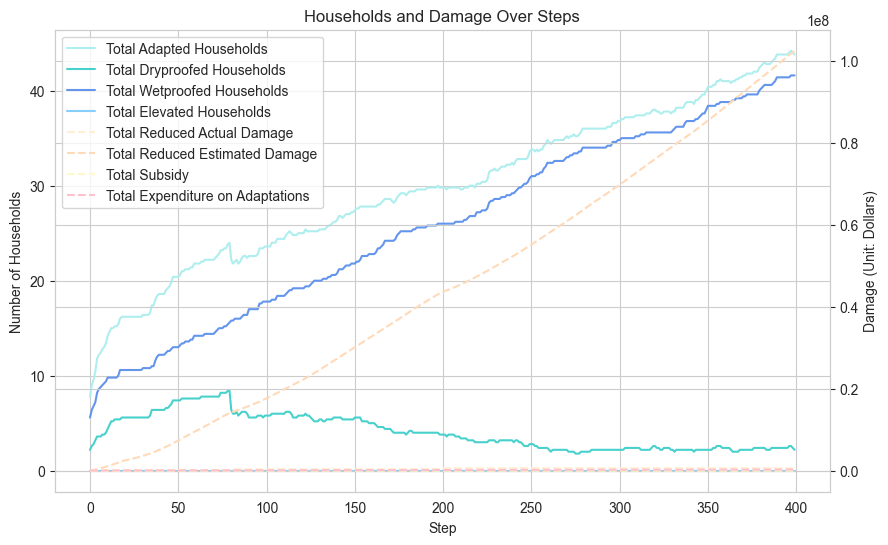

In [53]:
# Call the function to create the plot
create_dual_axis_line_chart(grouped_data, left_y_data, right_y_data, warm_colors, cold_colors, 'Households and Damage Over Steps')

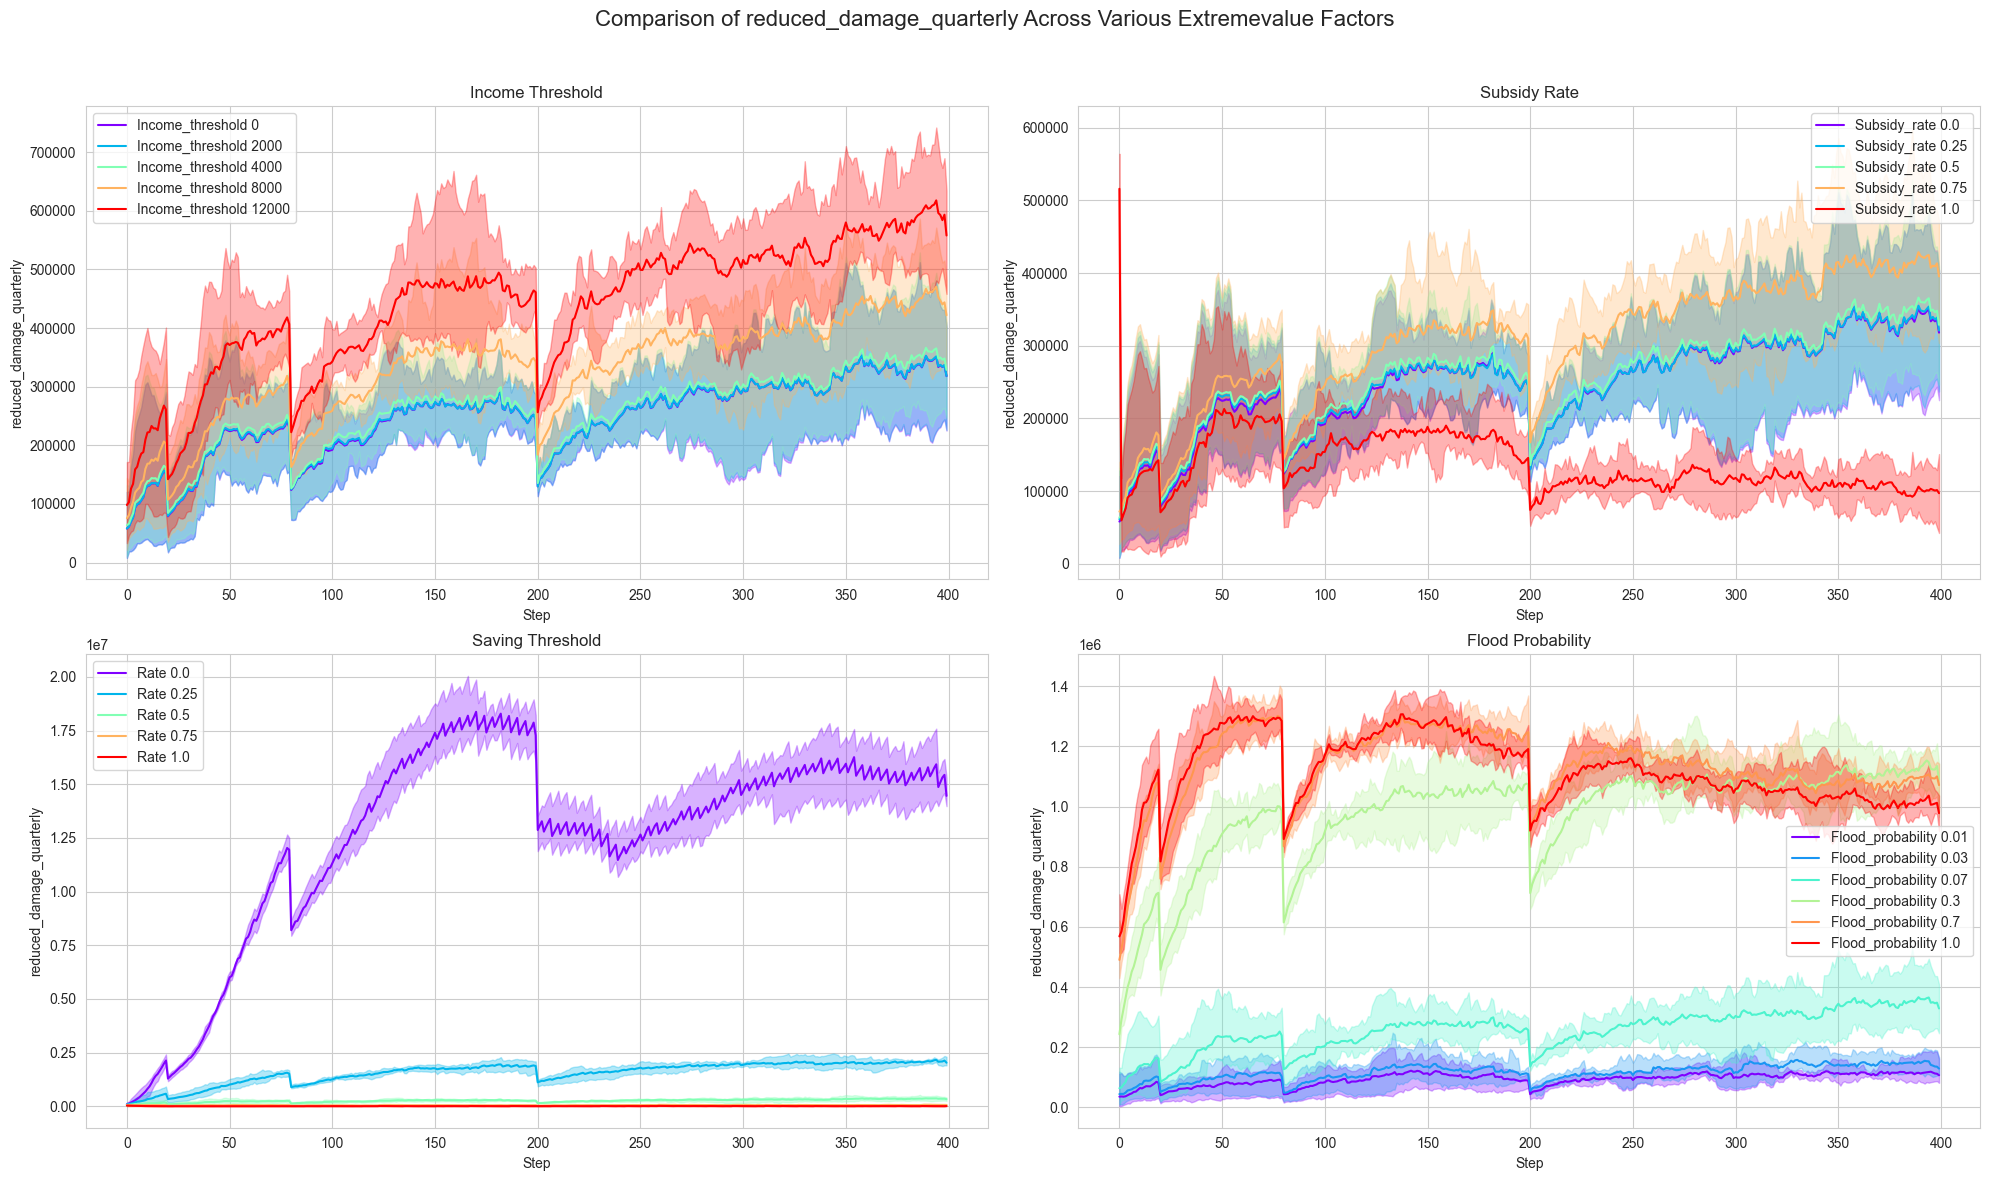

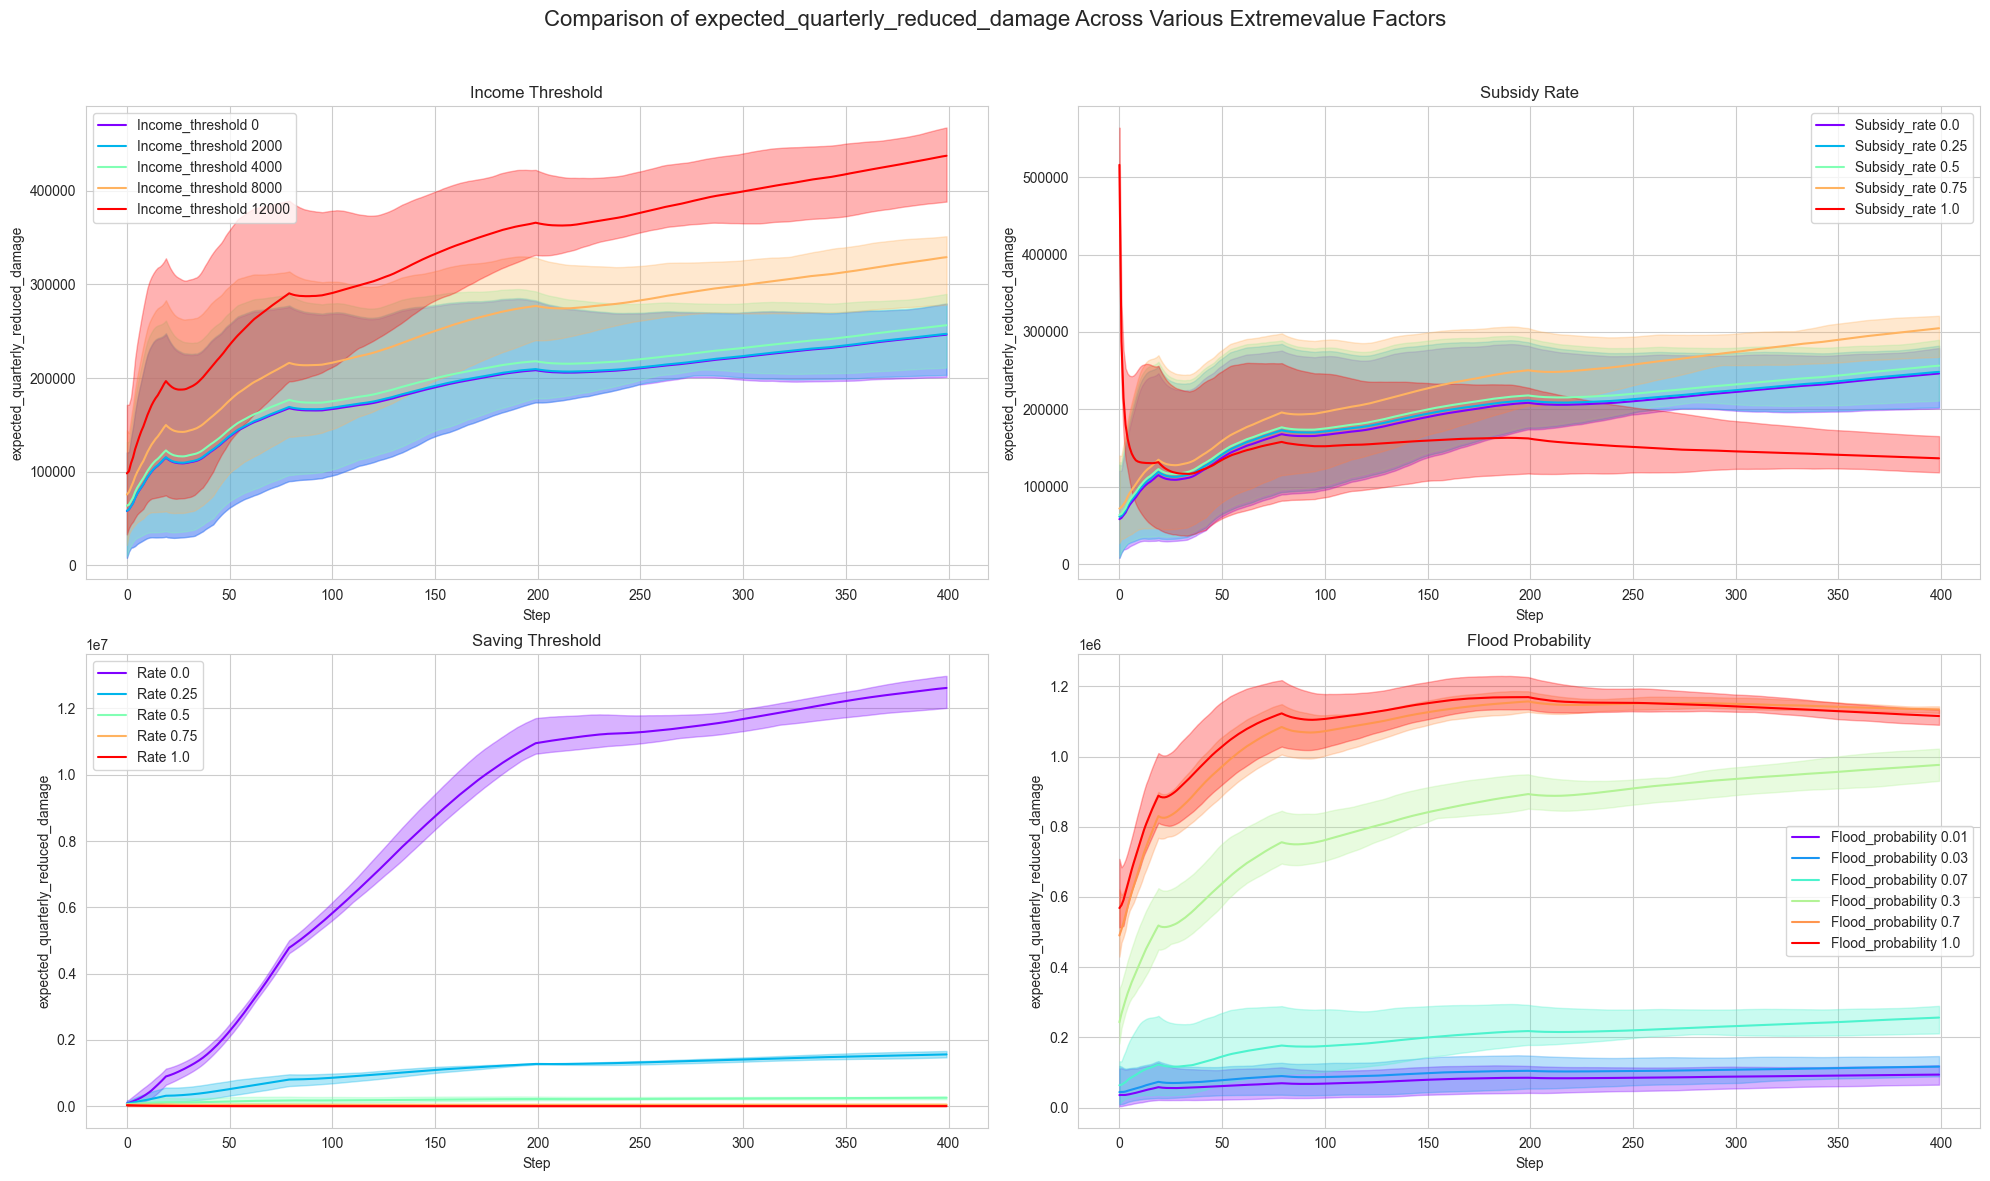

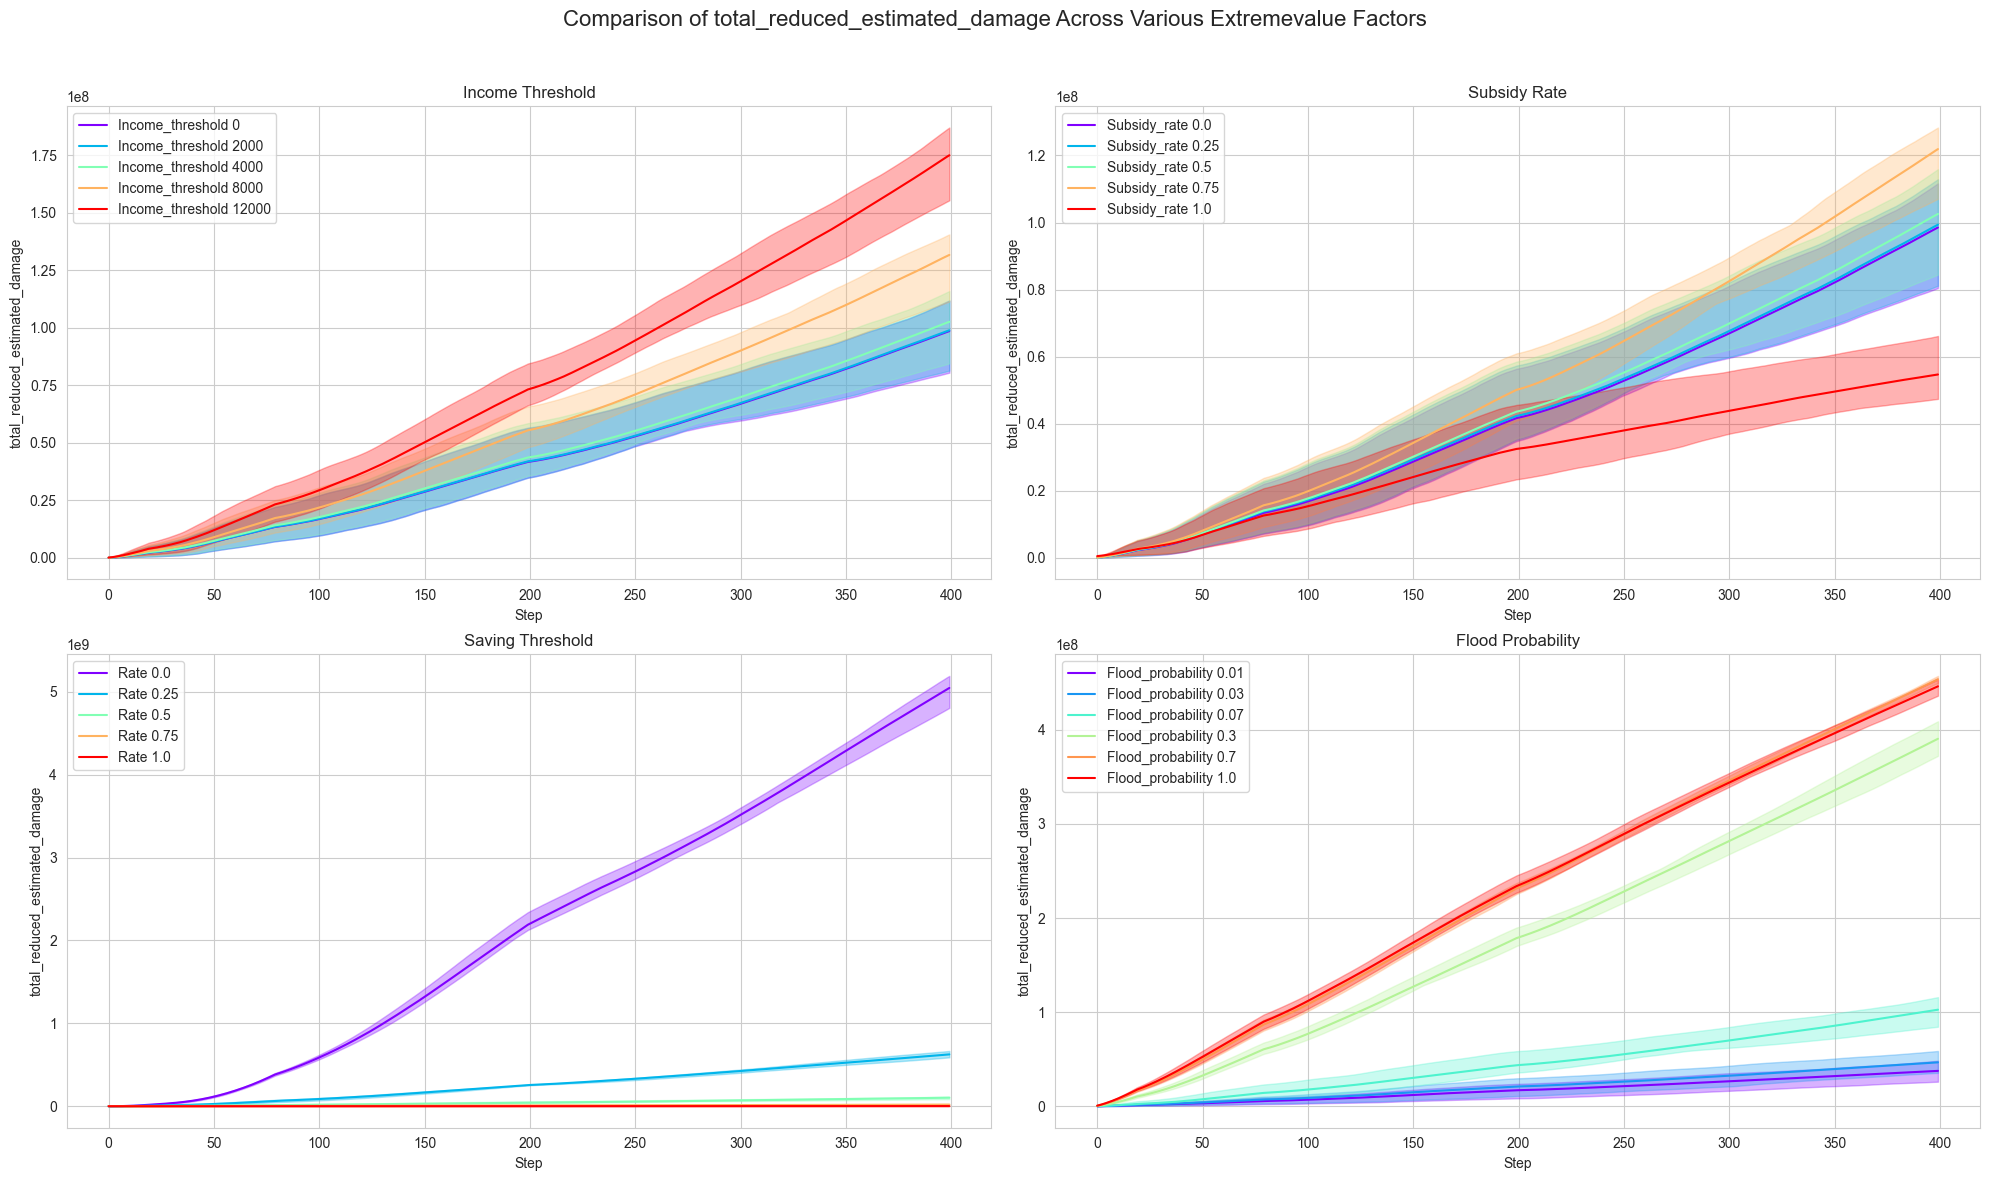

In [60]:
def group_data(df, group_column, kpi_column):
    return df.groupby(['Step', group_column])[kpi_column].agg(['mean', 'min', 'max']).reset_index()


def plot_data(grouped, group_column, ylabel, ax, title):
    unique_values = grouped[group_column].unique()
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_values)))

    for value, color in zip(unique_values, color_map):
        subset = grouped[grouped[group_column] == value]
        ax.plot(subset['Step'], subset['mean'], label=f'{group_column.capitalize()} {value}', color=color)
        ax.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

    ax.set_xlabel('Step')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()


def analyze_kpi(kpi_column):
    # Read dataframes
    dataframes = {
        "income_threshold": pd.read_csv("../result_extremevalue/model_sensitivity_results_income_threshold.csv"),
        "subsidy_rate": pd.read_csv("../result_extremevalue/model_sensitivity_results_subsidy_rate.csv"),
        "rate": pd.read_csv("../result_extremevalue/model_sensitivity_results_saving_threshold.csv"),
        "flood_probability": pd.read_csv("../result_extremevalue/model_sensitivity_results_flood_prob.csv")
    }

    # Compute ratios for each dataframe
    for df in dataframes.values():
        df['subsidy_damage_ratio'] = df['total_subsidy'] / df['total_reduced_estimated_damage']
        df['cost_damage_ratio'] = (df['total_subsidy'] + df['total_expenditure_on_adaptations']) / df['total_reduced_estimated_damage']
        df['adaptation_damage_ratio'] = df['total_expenditure_on_adaptations'] / df['total_reduced_estimated_damage']

    # Group data
    grouped_data = {key: group_data(df, key, kpi_column) for key, df in dataframes.items()}

    # Create figure and subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 12))  # Adjust as needed

    # Plot data
    plot_data(grouped_data["income_threshold"], 'income_threshold', kpi_column, axs[0, 0], 'Income Threshold')
    plot_data(grouped_data["subsidy_rate"], 'subsidy_rate', kpi_column, axs[0, 1], 'Subsidy Rate')
    plot_data(grouped_data["rate"], 'rate', kpi_column, axs[1, 0], 'Saving Threshold')
    plot_data(grouped_data["flood_probability"], 'flood_probability', kpi_column, axs[1, 1], 'Flood Probability')

    # Set the title for the entire figure
    fig.suptitle(f'Comparison of {kpi_column} Across Various Extremevalue Factors', fontsize=16)

    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()

# analyze_kpi('total_adapted_households')
# analyze_kpi('total_elevated_households')
# analyze_kpi('total_dryproofed_households')
# analyze_kpi('total_wetproofed_households')
# analyze_kpi('total_reduced_actual_damage')
# analyze_kpi('cost_damage_ratio')
analyze_kpi('reduced_damage_quarterly')
analyze_kpi('expected_quarterly_reduced_damage')
analyze_kpi('total_reduced_estimated_damage')